In [1]:
# !pip install pandas numpy seaborn scipy openpyxl

In [2]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn as sns
from scipy import stats

In [3]:
xl_path = 'Planilha Suporte - Fundamentos de Estatisticaxlsx Portugues.xlsx'

# Fundamentos de Estatística

## Estatítica descritiva

### Qualitativos

In [4]:
qual_df = pd.read_excel(
    xl_path,
    sheet_name='Tabela de Frequências',
    usecols=[0,1],
)
qual_df.head()

,Indivíduo,País de Origem
0,1,Brasil
1,2,Inglaterra
2,3,Japão
3,4,EUA
4,5,Brasil


In [5]:
frequencies = (
    qual_df.loc[:,'País de Origem']
    .value_counts()
    .to_frame(name='cnt')
    .assign(
        relative_freq=lambda df: df.cnt.div(df.cnt.sum()).mul(100),
        cumcnt=lambda df: df.cnt.cumsum(),
        cum_relative_freq=lambda df: df.cumcnt.div(df.cnt.sum()).mul(100),
    )
    .round(2)
)
frequencies

,cnt,relative_freq,cumcnt,cum_relative_freq
País de Origem,,,,
Brasil,59,19.67,59,19.67
EUA,35,11.67,94,31.33
Índia,19,6.33,113,37.67
China,18,6.00,131,43.67
Uruguai,17,5.67,148,49.33
Japão,16,5.33,164,54.67
Austrália,15,5.00,179,59.67
África do Sul,14,4.67,193,64.33
Rússia,14,4.67,207,69.00


<Axes: ylabel='relative_freq'>

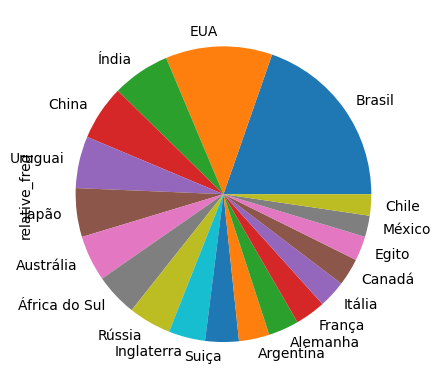

In [6]:
frequencies.relative_freq.plot.pie()

---

### Quantitativos

In [7]:
quant_df = (
    pd.read_excel(
        xl_path,
        sheet_name='Descritivas - Quantitativa',
        usecols=[0,1],
        nrows=100
    )
)
quant_df.head()

,Nº Observação,Preço ($)
0,1,189
1,2,195
2,3,199
3,4,189
4,5,197


In [8]:
(
    quant_df[['Preço ($)']].describe(percentiles=[.25,.75,.2,.6,.44,.85])
    .T
    .assign(
        amplitude=quant_df['Preço ($)'].max()-quant_df['Preço ($)'].min(),
        var=quant_df['Preço ($)'].var(),
        stderr=quant_df['Preço ($)'].sem(),
        cov=(quant_df['Preço ($)'].std()/quant_df['Preço ($)'].mean())*100,
        mode=quant_df['Preço ($)'].mode().values if len(quant_df['Preço ($)'].mode().values) == 1 else np.nan,
        skew=quant_df['Preço ($)'].skew(),
        kurtosis=quant_df['Preço ($)'].kurt(),
    )
    .round(4)
    .T
)

,Preço ($)
count,100.0000
mean,190.7700
std,15.6211
min,149.0000
20%,179.0000
25%,179.0000
44%,189.0000
50%,189.0000
60%,196.4000
75%,199.0000


PDF

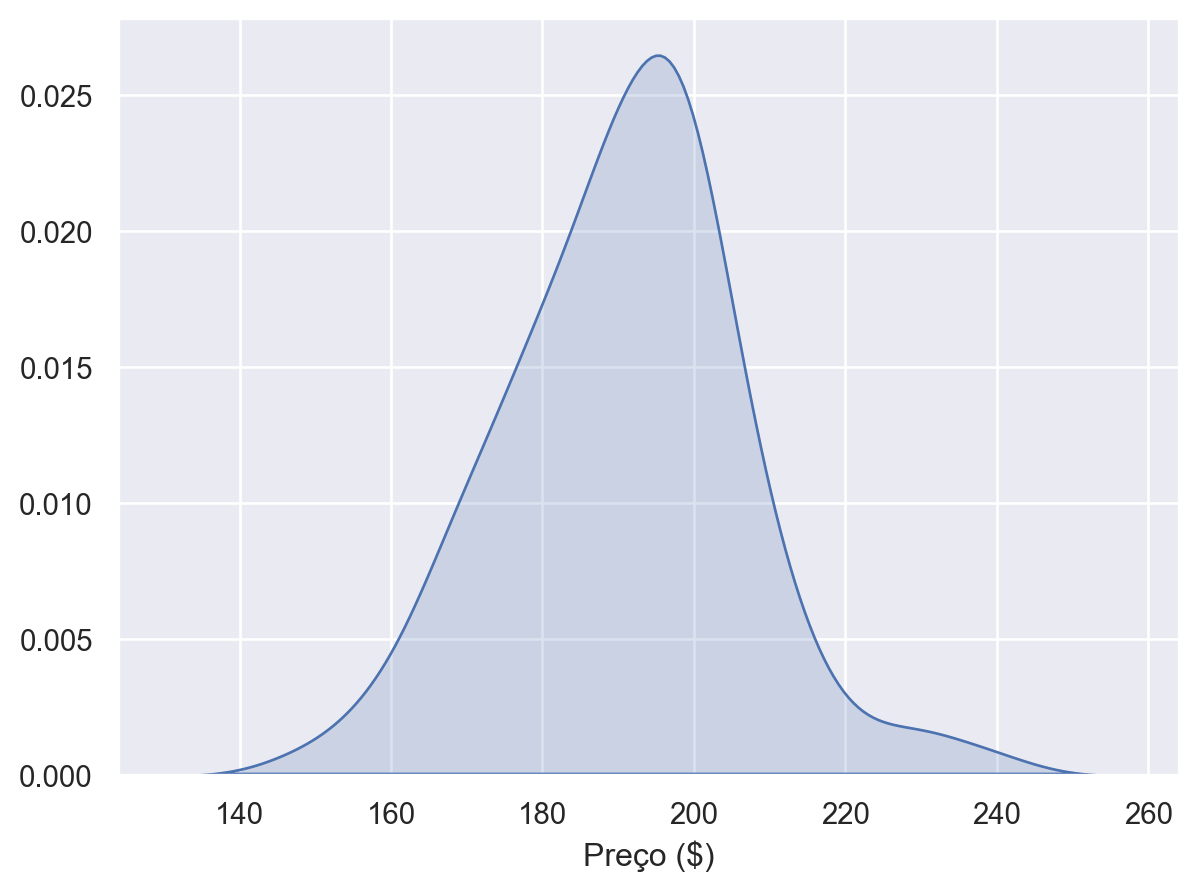

In [9]:
(
    so.Plot(quant_df, x='Preço ($)')
    .add(so.Area(), so.KDE())
)

CDF

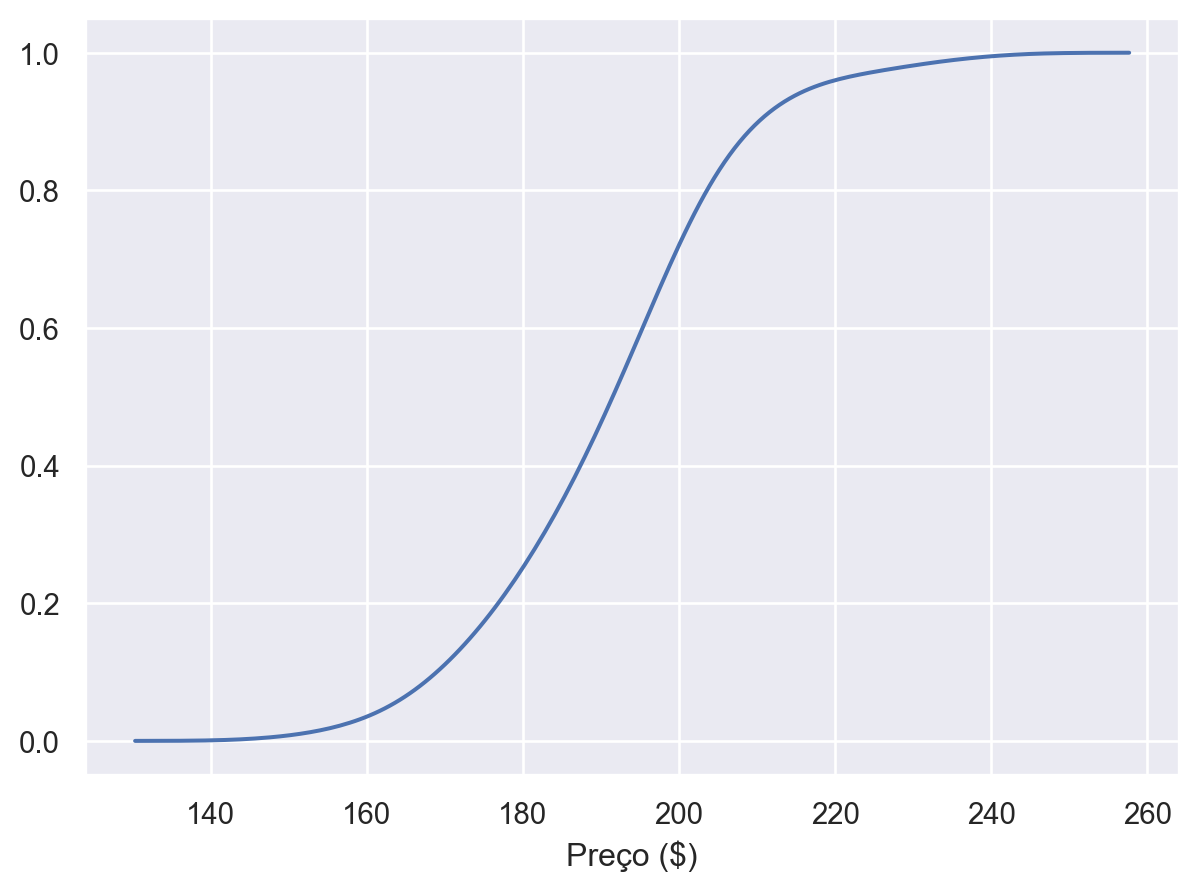

In [10]:
(
    so.Plot(quant_df, x='Preço ($)')
    .add(so.Line(), so.KDE(cumulative=True))
)

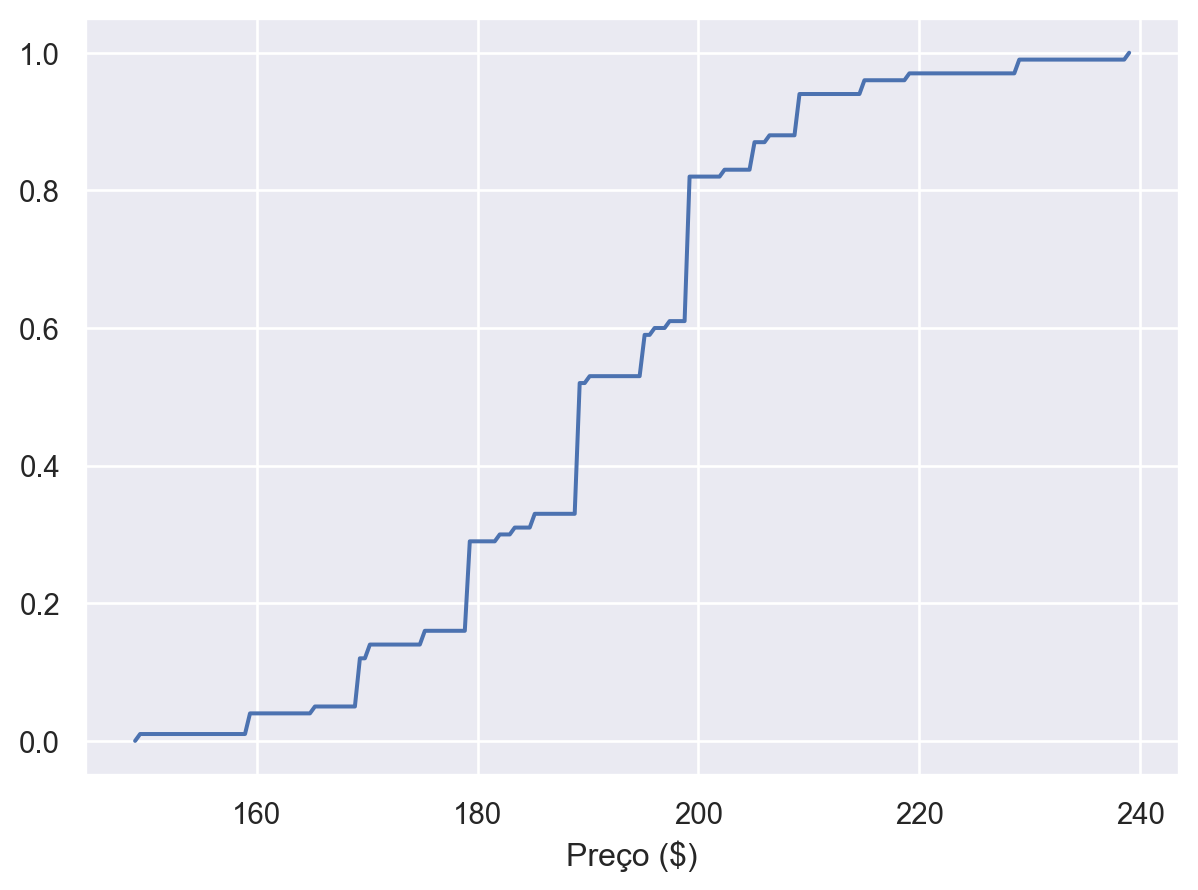

In [11]:
(
    so.Plot(quant_df, x='Preço ($)')
    .add(so.Line(), so.KDE(bw_adjust=1E-10, cumulative=True))
)

---

## Teste Qui²

In [12]:
chi_df = (
    pd.read_excel(
        xl_path,
        sheet_name='Associação - Qui²',
        usecols=[1,2,3,4],
        header=3,
        index_col=0,
        nrows=3,
    )
)
chi_df.head()

,Baixo,Médio,Alto
Total Health,40,16,12
Viva Vida,32,24,16
Mena Saúde,24,32,4


In [13]:
f_obs = (
    chi_df
    .stack()
)
f_obs

Total Health  Baixo    40
              Médio    16
              Alto     12
Viva Vida     Baixo    32
              Médio    24
              Alto     16
Mena Saúde    Baixo    24
              Médio    32
              Alto      4
dtype: int64

In [14]:
f_exp = (
    pd.concat([
        f_obs.groupby(level=0).sum(),
        f_obs.groupby(level=1).sum()
    ])
    .to_frame()
    .T
    .corr(method=lambda x,y: x*y/f_obs.sum())
    .stack()
    .loc[f_obs.index]
)
f_exp

Total Health  Baixo    32.64
              Médio    24.48
              Alto     10.88
Viva Vida     Baixo    34.56
              Médio    25.92
              Alto     11.52
Mena Saúde    Baixo    28.80
              Médio    21.60
              Alto      9.60
dtype: float64

In [15]:
ddof = 6-2
chi2val, pvalue = stats.chisquare(f_obs, f_exp, ddof=ddof)
critical05 = stats.chi2.ppf(1-.05, ddof)
print(f'''χ²: {chi2val:.3f}
pvalue: {pvalue:.4f}
Critical (.05): {critical05:.3f}
''')

χ²: 15.861
pvalue: 0.0032
Critical (.05): 9.488



---

## Distribuição t

In [16]:
ddof = 23  # from exercise #10
t = np.arange(-5.0,5.1,0.1)
pdf = stats.t.pdf(t, ddof)

In [17]:
tdist = pd.DataFrame({'t': t, 'pd': pdf})

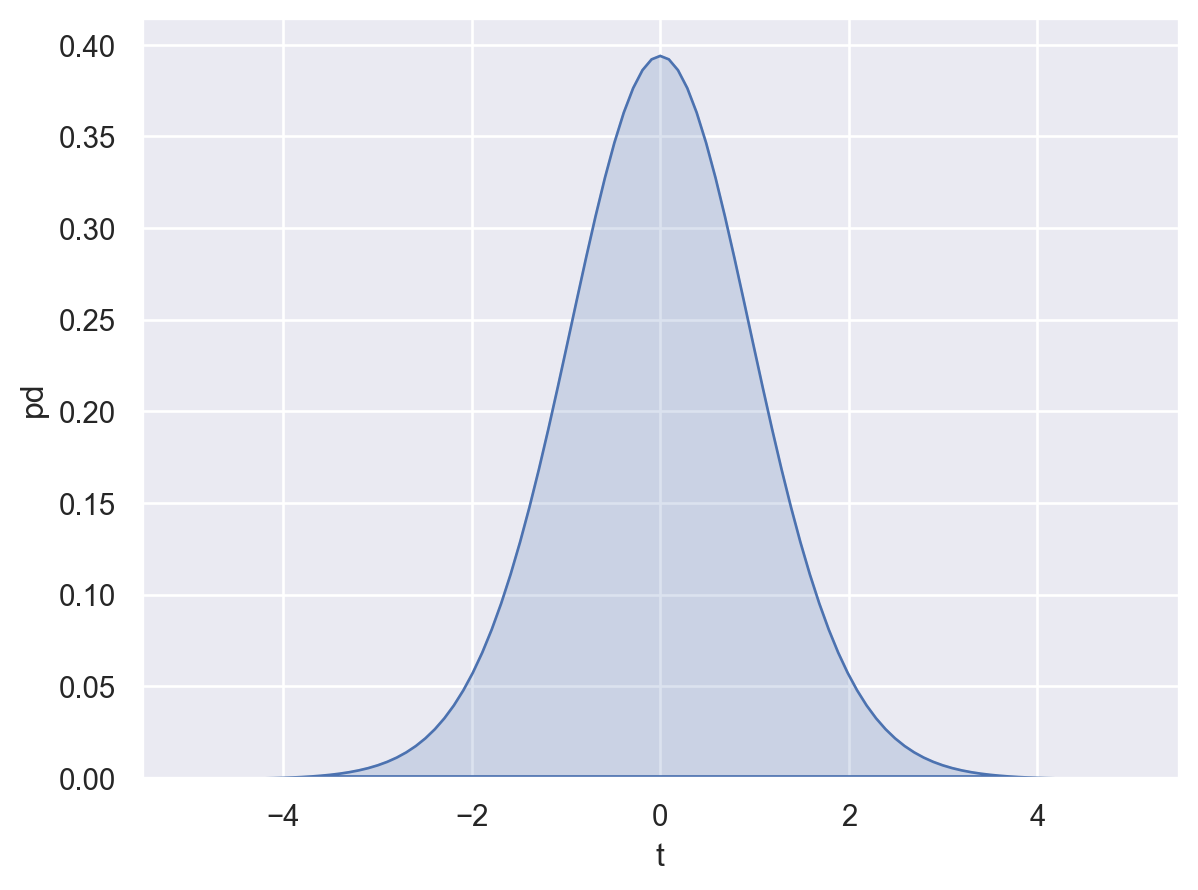

In [18]:
(
   so.Plot(tdist, x='t', y='pd')
    .add(so.Area())
)

### Teste t de uma amostra 

$ \displaystyle t = \frac{\bar{x} - \mu _{0}}{s/\sqrt{n}} $

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/One_sample_t-test.png" width="500"/>
</div>